# Intelligence artificielle et apprentissage

Préambule :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from random import uniform
from math import sqrt

L'intelligence artificielle est aujourd'hui une notion très employée et synonyme d'efficacité et de beaucoup de promesses. Des progrès récents spectaculaires permettant atteindre des performances sur-humaines dans de nombreux domaines (étude d'images médicales, jeux de go, étude de repliement de molécules, ...).

Prenons l'exemple des jeux à deux joueurs aux règles bien définies :

- En 1996, le grand maître des échecs *Kasparov* bat le supercalculateur d'IBM, *Deep Blue*. L'année suivante, l'ordinateur prend sa revanche.  Sa façon de jouer consiste à évaluer, avec de la *force brute* (et aussi beaucoup de raffinements), les différents coups pouvant être joués, et leurs conséquences à long terme. Ses performances sont donc directement liées à la puissance de calcul et au temps de calcul disponible.La puissance de calcul de l'ordinateur utilisé était de l'ordre de la puissance actuellement disponible dans un smartwatch....

- Le jeu de Go est un jeu offrant beaucoup plus de possibilités aux joueurs : ainsi, pendant longtemps, on a pensé que les joueurs humains, et leur façon de jouer *intuitive*, battrait toujours l'ordinateur. Cependant, en 2016, le programme d'intelligence artificielle *AlphaGo*, de Google, bat un des meilleurs joueur du monde *Lee Sedol*. Cette victoire marque un tournant symbolique : alors que Kasparov avait été battu par la *force brute*  d'un code informatique rédigé par des informaticiens, code **figé**; Lee Sedol  a été battu par un programme capable d'**apprendre** (en utilisant des réseaux neuronaux) et de **faire évoluer son comportement** et ses réponses aux coup adverses au fur et à mesure des parties jouées. La différence est fondamentale : comme l'explique l'un des créateurs d'AlphaGo, "*Bien que nous ayons programmé cette machine, nous n'avons aucune idée des coups qu'elle va jouer. Ces coups sont un phénomène émergent de son apprentissage. Nous avons seulement créé la base de données et les algorithmes d'apprentissage. Mais les coups que trouve le programme nous échappent, et sont d'ailleurs bien meilleurs que ceux que nous pourrions trouver en tant que joueurs de go*". Depuis, les grands maîtres s'inspire des coups joués par cette intelligence artificielle, coups parfois qualifiés de *créatifs* et *inspirés*.

- Aujourd'hui, les programmes d'intelligence artificielle règnent aussi sur les échecs, et de nombreux autres jeux plus complexes (en particulier quelques jeux vidéos).

L'intelligence artificielle repose, comme l'intelligence humaine, sur l'apprentissage à partir de données. Cet apprentissage pourra êtres **supervisé** ou **non-supervisé**.

Les algorithmes que nous allons étudier ici sont assez anciens et simples, mais permettent cependant, avec les puissances de calculs et les données disponibles aujourd'hui, d'applications intéressantes.

# Dictionnaires : rappels et compléments

On profite de cette séance pour rappeler quelques notions sur les dictionnaires, et en présenter d'autres complémentaires.

## Utilisation de dictionnaires

Création d'un dictionnaire :

In [2]:
Stocks = dict()
Stocks["oranges"] = 18
Stocks["pommes"] = 3
Stocks["kiwis"] = 41
Stocks

{'oranges': 18, 'pommes': 3, 'kiwis': 41}

Un dictionnaire est une *table d'association* : on associe, à chaque **clef** du dictionnaire (un fruit dans l'exemple étudié ici) une **valeur** (nombre de fruits en stock ici). On peut ensuite modifier la valeur d'une clef :

In [3]:
Stocks["kiwis"] -= 5
Stocks

{'oranges': 18, 'pommes': 3, 'kiwis': 36}

On peut obtenir les clefs, la valeurs et les couples (clef, valeur) en utilisant les commandes suivantes : 

In [4]:
print(Stocks.keys())
print(Stocks.values())
print(Stocks.items())

dict_keys(['oranges', 'pommes', 'kiwis'])
dict_values([18, 3, 36])
dict_items([('oranges', 18), ('pommes', 3), ('kiwis', 36)])


Pour parcourir un dictionnaire, plusieurs possibilités, la plus courante et simple est la suivante :

In [5]:
for clef in Stocks : # raccourci pour for clef in Stocks.keys()
    print(clef, Stocks[clef])

oranges 18
pommes 3
kiwis 36


On peut aussi utiliser la suivante :

In [6]:
for (clef, valeur) in Stocks.items() :
    print(clef, valeur)

oranges 18
pommes 3
kiwis 36


Pour tester si une clef existe :

In [7]:
print("kiwis" in Stocks)
print("mandarines" in Stocks)

True
False


De nombreuses fonctions existent pour les dictionnaires, dont un certain nombre similaires à celles pour les listes (`len`, `copy`).

## Quelques explications théoriques : table de hachage

Du point de vue de la machine, les données sont stockées à des emplacements mémoires, à des adresses données. On peut modéliser simplement ces adresses par un nombre entier, un indice. Il est donc nécessaire, pour construire une structure de donnée de type *dictionnaire*, d'avoir une correspondance entre les *clefs* et les *indices* : cette correspondance est assurée par une **fonction de hachage**.

Sur l'exemple ci-dessous, pour créer un dictionnaire associant des numéros de téléphone à des noms, on définit une table d'indices. La fonction de hachage est la fonction permettant de passer des noms à ces indices :

![](im/Hachage.png)   

Pour notre exemple de dictionnaire `Stocks`, essayons la fonction de hachage suivante :

In [8]:
import string

# Création dictionnaire lettre : indice
alphabet = list(string.ascii_lowercase)
Dict_alphabet = dict()
for i in range(len(alphabet)) :
    lettre = alphabet[i]
    Dict_alphabet[lettre] = i

def fonction_h(chaine) :
    """ Fonction de hachage : retourne pour chaque mot 'chaine' un nombre entier 
    qui est la somme des places dans l'aphabet des lettre constituants 'chaine'"""
    somme = 0
    for lettre in chaine :
        somme += Dict_alphabet[lettre]
    return somme

In [9]:
Dict_alphabet

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [10]:
for fruit in Stocks:
    print('Indice de '+fruit+' donné par la fonction de hachage : '+str(fonction_h(fruit)))

Indice de oranges donné par la fonction de hachage : 72
Indice de pommes donné par la fonction de hachage : 75
Indice de kiwis donné par la fonction de hachage : 66


Cette fonction fonctionne bien pour notre exemple simple, car les trois fruits correspondent à trois indices différents : on dit qu'il n'y a pas de **collisions** (cela correspond au fait que la fonction, sur l'espace de départ considéré, est injective !). Mais si on veut ajouter un légume :

In [11]:
fonction_h('carotte') == fonction_h('pommes')

True

Collision ! Notre fonction de hachage ne sera alors pas suffisante pour ce dictionnaire. Notre fonction de hachage possède bien d'autres défauts : elle ne fonctionne qu'avec des mots *simples* (pas de tiret, pas d'accent, d'apostrophes, ... ) sans majuscules. Python propose sa propre fonction de hachage, `hash` :

In [12]:
for fruit in Stocks:
    print('Indice de '+fruit+' donné par la fonction de hachage : '+str(hash(fruit)))

Indice de oranges donné par la fonction de hachage : 3191609894191108502
Indice de pommes donné par la fonction de hachage : 3940225673629195424
Indice de kiwis donné par la fonction de hachage : -5412629406744124289


C'est évidemment une fonction bien plus complexes et puissante. Vous pouvez d'ailleurs remarquer qu'elle ne retourne pas les mêmes résultats selon l'ordinateur considéré.

Un autre intérêt du principe de la table de hachage, qui la rend nécessaire : elle permet un accès accès en un temps $\mathcal{O}(1)$ à la bonne adresse mémoire. Il n'est en effet pas nécessaire de parcourir toutes les clefs précédentes pour trouver la clef voulue, grâce il suffit d'appliquer une fois la fonction de hachage.

Enfin il est important de noter que le principe de la table de hachage impose que les clefs doivent être des objets non modifiable (*non mutable*), comme des nombres, des chaînes de caractères, des tuples, ... mais pas des listes !

# Apprentissage supervisé

On distingue deux type d'apprentissage : le plus fréquent, l'apprentissage supervisé, consiste pour un opérateur à montrer à la machines des milliers voire des millions d'exemples étiquetés avec leur catégorie, qui permettront à la machine de déterminer elle-même les paramètres pertinents pour classer chaque objet dans la catégorie qui
lui correspond. Une fois cette phase d'apprentissage terminée, la machine doit être capable de généraliser à des objets pas encore vu.  

## Présentation de l'exemple d'étude

Commençons avec un exemple simple : nous allons considérer un ensemble de points de coordonnées $(x, y) \in [-1, 1]$ , qui peuvent appartenir à deux catégories :

- soit le point est à l'intérieur du cercle de centre $O$, de rayon $0,8$, et on lui attribue la couleur bleu,

- soit le point est en-dehors de ce cercle, et on lui attribue la couleur orange.

Ces points seront tirées aléatoirement, et constitueront les données d'entraînements : nous allons les fournir au programme d'intelligence artificielle, en étiquetant la catégorie (à l'intérieur ou à l'extérieur du cercle).

**Question 1 :** Écrire une fonction `donnees_ent(n_samp)` générant `n_samp` données d'entraînement. Cette fonction retournera un dictionnaire ayant pour clefs les tuples `(x, y)` des coordonnées des `n_samp` points, et pour valeur associée un booléen `True` ou `False` selon si le point associé est à l'intérieur du cercle ou non. On utilisera la fonction `uniform(-1,1)` pour générer un nombre aléatoire compris entre $-1$ et $1$.

In [13]:
def donnees_ent(n_samp):
    Dict_ent = dict()
    for i in range(n_samp):
        x, y =  uniform(-1,1), uniform(-1,1)
        if x**2 + y**2 < 0.8**2 :
            Dict_ent[(x, y)] = True
        else :
            Dict_ent[(x, y)] = False   
    return Dict_ent

Représentons quelques données :

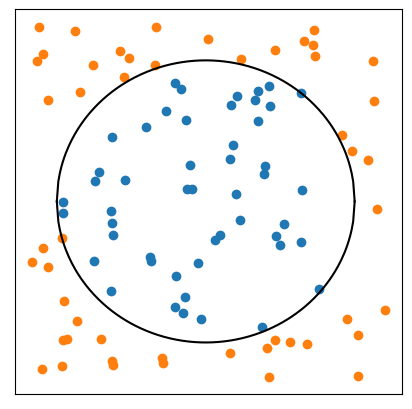

In [14]:
Dict_ent = donnees_ent(100)

plt.figure(figsize=(5,5))

# Cercle :
x = np.linspace(-0.8, 0.8, 200)
plt.plot(x, np.sqrt(0.8**2 - x**2), color='k')
plt.plot(x, -np.sqrt(0.8**2 - x**2), color='k')

# Points :
X_in, X_out, Y_in, Y_out = [], [], [], []
for clef in Dict_ent :
    if Dict_ent[clef] :
        X_in.append(clef[0])
        Y_in.append(clef[1])
    else :
        X_out.append(clef[0])
        Y_out.append(clef[1])
    
plt.scatter(X_in, Y_in)
plt.scatter(X_out, Y_out)
plt.xticks([])
plt.yticks([])
plt.show()

Le but de notre algorithme sera d'étiqueter correctement un nouveau point généré aléatoirement :

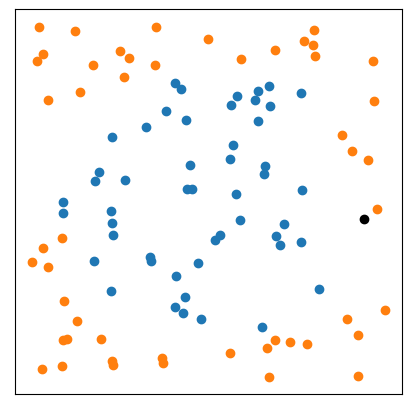

In [15]:
plt.figure(figsize=(5,5))
# Données entraînement :
plt.scatter(X_in, Y_in)
plt.scatter(X_out, Y_out)
plt.xticks([])
plt.yticks([])
# Nouveau point à étiquet :
x, y = uniform(-1, 1), uniform(-1, 1)
plt.scatter(x, y, color = 'k')
plt.show()

Écrire un algorithme permettant de déterminer la couleur réelle du point noir repose sur un apprentissage supervisé car on possède déjà des points d'entraînement dont on connaît la couleur. Une intervention humaine initial, pour le *bon étiquetage*, est ici indispensable ! 

Attention, il est ici important de bien comprendre que pour déterminer la couleur du point noir, la règle sous-jacente d'étiquetage (bleu si dans le disque de rayon $0,8$) est inconnue ! 

## Algorithme des k plus proches voisins

Cet algorithme repose sur une idée intuitive : pour attribuer une couleur au point noir de test, il peut être utile de regarder la couleur des points d'entraînements  qui lui sont voisin. Nous allons donc attribuer la couleur majoritaire des k plus proches voisins au point de test.

**Question 2 :** Écrire une fonction `dist_eucl(pointA, pointB)` qui retourne la distance euclidienne (basée sur norme 2 sur l'espace vectoriel $\mathbf{R}^2$) entre les points A et B, `pointA` et `pointB` étant des tuples contenant l'abscisse et l'ordonnée de ces points.

In [16]:
def dist_eucl(pointA, pointB) :
    xA, yA = pointA
    xB, yB = pointB
    return sqrt((xB - xA)**2 + (yB - yA)**2)

**Question 3 :** Compléter le code de la fonction `coul_ppv(point_test, Dict_ent, k)`, qui, à partir d'un point test représenté par un tuple `point_test` (abscisse, ordonnée) et d'un dictionnaire de données d'entraînement tel que celui retourné par la fonction `donnees_ent`; retourne la couleur majoritaire (via une variable booléenne : `True` si bleu, `False` sinon) dans les k points d'entraînements plus proches voisins du point test.

In [17]:
def coul_ppv(point_test, Dict_ent, k) :
    # on demande un nombre k impair, pourqu'une couleur majoriataire se dégage !
    assert k%2 == 1 
    
    # on construit le dictionnaire {distance eucl au point test : couleur}
    Dict_dist_coul = dict()
    for point in Dict_ent :
        Dict_dist_coul[dist_eucl(point,point_test)] = Dict_ent[point]
    
    # Liste des distances triées par ordre croissant :
    Dist_t = sorted(Dict_dist_coul.keys())
    
    # Détermination du nombre de point bleu parmi les k plus proches voisins :
    nb_bleu = 0
    for i in range(k) :
        coul = Dict_dist_coul[Dist_t[i]]
        if coul == True :
            nb_bleu += 1
    
    # Détermination de la couleur majoritaire :
    if nb_bleu > k//2 :
        return True
    else :
        return False  

Vérifions le bon fonctionnement avec les 5 plus proches voisins considérés, pour 30 points test :

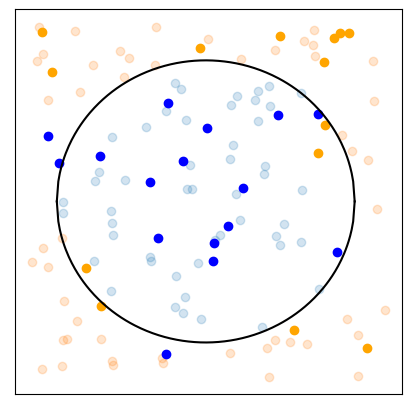

In [18]:
plt.figure(figsize=(5,5))

# Cercle :
x = np.linspace(-0.8, 0.8, 200)
plt.plot(x, np.sqrt(0.8**2 - x**2), color='k')
plt.plot(x, -np.sqrt(0.8**2 - x**2), color='k')

# Points d'entraînement (en transparence) :
plt.scatter(X_in, Y_in, alpha = 0.2)
plt.scatter(X_out, Y_out, alpha = 0.2)
plt.xticks([])
plt.yticks([])

# 20 points test :
for i in range(30) :
    point_test = (uniform(-1, 1), uniform(-1, 1))
    if coul_ppv(point_test, Dict_ent, 5) == True :
        plt.scatter(point_test[0], point_test[1], color = 'b')
    else :
        plt.scatter(point_test[0], point_test[1], color = 'orange')
plt.show()

**Question 4 :** Commenter l'aspect de la figure ci-dessus, en particulier justifier les *erreurs* d'étiquetage faites par l'algorithme.

On peut bien évidemment tester d'autres configurations, avec plus de données de tests et/ou d'autres valeurs de k.

## Évaluation et optimisation

Comme on a pu le remarquer, cet algorithme ne donne pas de résultats exacts, on parle alors d'**heuristique** : il s'agit d'une méthode pour solutionner un problème complexe de façon *simple* et *rapide*, mais pas nécessairement optimale et/ou exacte.

Évaluons la précision de notre algorithme des plus proches voisins : nous nommerons erreur le pourcentage de points test auxquels l'algorithme attribue la *mauvaise* couleur.

**Question 5 :** Compléter le code de la fonction `erreur_ppv(n_samp, n_ test, k)` retournant l'erreur pour `n_samp` points d'apprentissage, `n_test` points test et `k voisins considérés`.

In [19]:
def erreur_ppv(n_samp, n_test, k) :
    
    erreur = 0
    
    Dict_ent = donnees_ent(n_samp)
    
    for i in range(n_test) :
        # Création du point test, placé aléatoirement :
        point_test = (uniform(-1, 1), uniform(-1, 1))
        # Int variable booléenne : True si point test à l'intérieur du disque :
        Int = point_test[0]**2 + point_test[1]**2 < 0.8**2
        # Test si erreur :
        if coul_ppv(point_test, Dict_ent, k) != Int :
            erreur += 1 / n_test
    return erreur

Évaluons alors l'effet du nombre de données de test et de k :

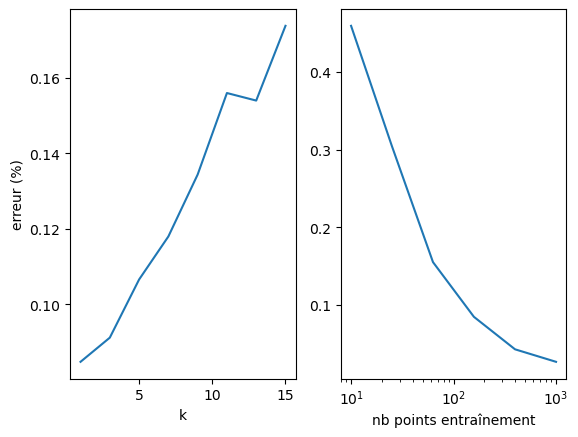

In [20]:
plt.figure()

plt.subplot(121)
K = []
E = []

for k in range(1, 16, 2) :
    K.append(k)
    erreur_k = 0
    for i in range(20):
        erreur_k += erreur_ppv(100, 500, k)/20
    E.append(erreur_k)

plt.plot(K,E)
plt.xlabel('k')
plt.ylabel('erreur (%)')

plt.subplot(122)
N_samp = []
E = []

for n_samp in np.logspace(1,3,6):
    N_samp.append(int(n_samp))
    erreur_n = 0
    for i in range(20):
        erreur_n += erreur_ppv(int(n_samp), 500, 5)/20
    E.append(erreur_n)

plt.plot(N_samp,E)
plt.xlabel('nb points entraînement')
plt.xscale('log')
plt.show()

Pour évaluer la précision de notre algorithme de façon un peu plus précise, on peut définir la **matrice de confusion** : il s'agit de la matrice présentant dans notre exemple 2 lignes et 2 colonnes. Dans la première ligne, on présentera le pourcentage de points étiquetés bleu par notre algorithme : ceux à raison dans la première colonne, et ceux à tord dans la deuxième. Dans la deuxième ligne, on présentera le pourcentage de points étiquetés orange par notre algorithme : ceux à tord dans la première colonne, et ceux à raison dans la deuxième. Cette matrice doit posséder les valeurs les plus importantes possibles dans la diagonale.

In [21]:
Mat_conf = [[0, 0], [0, 0]]
n_test = 500
n_samp = 100
k = 5

Dict_ent = donnees_ent(n_samp)
    
for i in range(n_test) :
    point_test = (uniform(-1, 1), uniform(-1, 1))
    Int = point_test[0]**2 + point_test[1]**2 < 0.8**2
    Int_ppv = coul_ppv(point_test, Dict_ent, k)
    if  Int == True and Int_ppv == True :
        Mat_conf[0][0] += 1 / n_test
    elif Int == False and Int_ppv == True :
        Mat_conf[0][1] += 1 / n_test
    elif Int == False and Int_ppv == False :
        Mat_conf[1][1] += 1 / n_test
    else :
        Mat_conf[1][0] += 1 / n_test
display(Mat_conf)

[[0.43200000000000033, 0.024000000000000007],
 [0.06600000000000004, 0.47800000000000037]]

**Question 6 :** Quels améliorations de cet algorithme des plus proches voisins pouvez-vous proposer ?

On peut proposer de raffiner la règle d'étiquetage, par exemple en :

- faisant une moyenne pondérée par la distance des couleurs des k plus proches voisins;

- considérant la couleur majoritaire des voisins situés à une distance maximale du point de test.

Remarque : si les données entraînement sont pas exactes ou biaisées (par l'opérateur), les résultats le seront aussi ! C'est une problématique actuelle des IA, pour lesquelles le choix des données d'entraînement est crucial.

## Application : reconnaissance de chiffres manuscrits

Grâce au module `scikit-learn`, on dispose de 1797 images de 8px par 8px, en 256 nuances de gris, représentant des chiffres manuscrits de 0 à 9 :

In [22]:
digits = load_digits()
X, y = digits.data, digits.target

Visualisons 10 échantillons de chaque chiffre :

In [23]:
def montrer_chiffres(X, y, limit_max=10):
    '''Montre des chiffres.'''
    labels, nombres = np.unique(y, return_counts=True)
    nombre_max = min(np.max(nombres), limit_max)
    img = np.zeros((100, nombre_max*10))
    for i in range(10):
        index_label = np.where(y == i)[0][:limit_max]
        for j, echantillon in enumerate(index_label):
            img[i*10+1:i*10+9,j*10+1:j*10+9] = X[echantillon].reshape((8, 8))
    plt.imshow(img, cmap='binary')
    plt.xticks([])
    plt.yticks(5 + 10*np.arange(10), np.arange(10))

In [24]:
def obtenir_echantillons(X, y, n_echantillons=10):
    '''Donne une sélection aléatoire d'échantillons pour chaque classe.'''
    index = []
    for label in np.unique(y):
        index_label = np.where(y == label)[0]
        replace = len(index_label) > n_echantillons
        index += list(np.random.choice(index_label, size=n_echantillons, replace=replace))
    return index

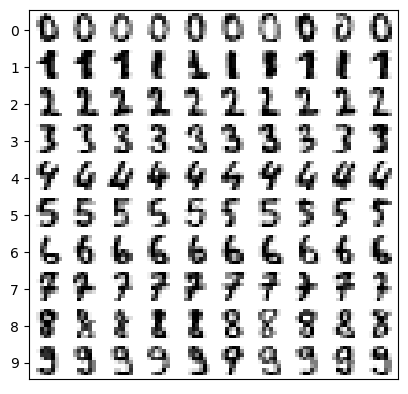

In [25]:
index = obtenir_echantillons(X, y)
montrer_chiffres(X[index], y[index])

Partageons toutes ces données : gardons-en 80% pour l'apprentissage, et les 20% restant pour les tests :

In [26]:
def partager_apprentissage_test(X, y, ratio_test=0.2):
    '''Partage un jeu de données entre apprentissage et test. 
    La répartition entre classes est conservée.'''
    index = []
    for label in np.unique(y):
        index_label = np.where(y==label)[0]
        size = int(ratio_test * len(index_label))
        replace = size < len(index_label)
        index += list(np.random.choice(index_label, size=size, replace=replace))
    X_test = X[index]
    y_test = y[index]
    index_ = np.ones(len(y), dtype=bool)
    index_[index] = False
    X_app = X[index_]
    y_app = y[index_]
    return X_app, X_test, y_app, y_test

In [27]:
X_app, X_test, y_app, y_test = partager_apprentissage_test(X, y)

Observons un des échantillons à tester :

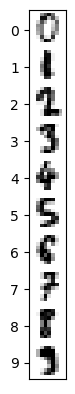

In [28]:
index = obtenir_echantillons(X_test, y_test, 1)
montrer_chiffres(X_test[index], y_test[index])

Recherchons alors les plus proches voisins de cet échantillon de test :

In [29]:
def rechercher_plus_proches_voisins(X_test, X_app, n_voisins=5):
    '''Recherche des plus proches voisins. 
    Retourne une matrice de taille (n_test, n_voisins).'''
    voisins = []
    for x in X_test:
        distances = np.linalg.norm(X_app - x, axis=1) # Calcul de la distance carrée (norme 2) entre tous les points d'apprentissage et le point de test, retourne un vecteur
        voisins.append(np.argpartition(distances, n_voisins)[:n_voisins]) # tri et retourne que les n_voisins premiers voisins pour le point de test
    return np.array(voisins)

In [30]:
voisins = rechercher_plus_proches_voisins(X_test[index], X_app)

Voici ces 5 plus proches voisins :

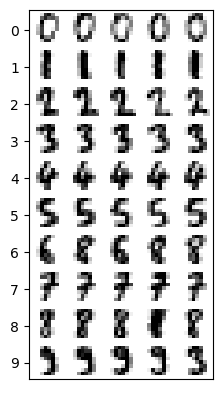

In [31]:
index = voisins.flatten()
montrer_chiffres(X_app[index], np.repeat(np.arange(10), voisins.shape[1]))

Étiquetons toutes les images de test :

In [32]:
def classifier_plus_proches_voisins(X_test, X_app, y_app, n_voisins=5):
    '''Classification par plus proches voisins. 
    Retourne la classe majoritaire.'''
    y_pred = []
    for x in X_test:
        distances = np.linalg.norm(X_app - x, axis=1)
        voisins = np.argpartition(distances, n_voisins)[:n_voisins]
        labels = y_app[voisins] # vecteur des classes à touver pour les donnés d'apprentissage
        labels_unique, compteurs = np.unique(labels, return_counts=True)
        y_pred.append(labels_unique[np.argmax(compteurs)])
    return np.array(y_pred)

In [33]:
y_pred = classifier_plus_proches_voisins(X_test, X_app, y_app)

Puis observons les erreurs d'étiquetage: :

In [34]:
index = np.where(y_pred != y_test)[0]

Commençons par les chiffres qu'on a mal classés ou étiqueté :

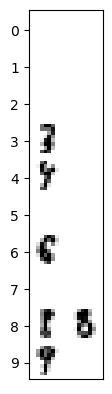

In [35]:
montrer_chiffres(X_test[index], y_test[index])

Puis l'étiquette qu'on leur a attribués :

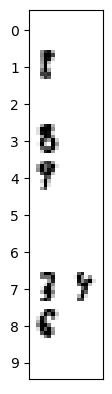

In [36]:
montrer_chiffres(X_test[index], y_pred[index])

**Question 7 :** Interpréter les deux dernières images.

**Question 8 :** A votre avis, comment est définie la distance euclidienne pour ces données ?

# Apprentissage non-supervisé


L'apprentissage non-supervisé est plus ambitieux que l'apprentissage supervisé, mais il est aussi plus proche de notre propre modèle d'apprentissage, basé sur l'observation. Il consiste à faire en sorte qu'à partir d'un ensemble de données la machine soit capable de créer ses propres catégories, et si possible que ces catégories soient pertinentes pour nous !

Par exemple, dans l'exemple précédent des chiffres manuscrits, les données étaient déjà étiquetées. Comment faire si on ne veut pas le faire nous-même ? Comment faire en sorte que "la machine" classe elle-même les images en 10 catégories ?

## Présentation de l'exemple d'étude

Commençons par un exemple visuellement plus simple, en considérant à nouveau des points répartis dans un plan, d'abscisse et ordonnée comprises entre -1 et 1 :

![](im/NS_init.png)   


Les points ne sont pas répartis ici au hasard, on distingue clairement, grâce à notre "intelligence", 3 groupes de points, comme montré sur la deuxième image. Le but de cette partie est de présenter un algorithme pouvant *partitionner* les points en 3 groupes.

## Algorithme des k-moyennes

Voici le fonctionnement de cet algorithme, avec l'exemple précédent, pour lequel $ k =3$ ($k$ est le nombre de groupes) :

- la première étape, l'**initialisation**, consiste à placer aléatoirement 3 centres, un par groupe;

- la deuxième étape, la **partition** affecte chaque point au groupe du centre le plus proche;

- enfin la troisième étape, la **mise à jour**, met à jour la position des centres des groupes.

![](im/NS_algo.png)   

Il s'agit ici d'une itération de l'algorithme : on reprend alors les étapes de partition puis de mise à jour de façon répétée. On espère alors que l'algorithme converge, c'est-à-dire que les positions des centres convergent vers des positions fixes. Les 3 groupes sont alors finalement déterminés.

**Question 9 :** Tester cet algorithme à l'adresse suivante http://mpechaud.fr/scripts/kmeans/kmeans.html. Arrive-t-on toujours à la solution optimale ? L'algorithme retourne-t-il toujours les mêmes groupes ? Expliquer !

C'est encore une fois méthode heuristique, qui ne converge pas forcement vers la meilleur solution, et la solution proposée peut dépendre de la position initiale aléatoire des centres. 

![](im/min_loc.jpg)

C'est un problème tout à fait analogue à la recherche du minimum global d'une fonction : selon le point de départ de la recherche, on peut se retrouver *piégé* dans le voisinage d'un minimum local.

## Application à la reconnaissance des chiffres manuscrits

Voici les fonctions permettant de coder l'algorithme k-moyenne :

In [37]:
def initialiser_centres(X, n_clusters):
    '''Initialise les centres des clusters de façon aléatoire.'''
    replace = n_clusters < len(X)
    index = np.random.choice(len(X), size=n_clusters, replace=replace)
    centres = X[index]
    return centres

In [38]:
def trouver_clusters(X, centres):
    '''Trouve les clusters à partir des centres (en fonction des distances).'''
    distances = []
    for x in centres:
        distances.append(np.linalg.norm(X - x, axis=1))
    distances = np.array(distances)
    y = np.argmin(distances, axis=0)
    return y

In [39]:
def trouver_centres(X, y):
    '''Trouve les centres à partir des clusters (indiqués par les labels).'''
    centres = []
    for label in np.unique(y):
        centre = np.mean(X[y==label], axis=0)
        centres.append(centre)
    return np.array(centres)

In [40]:
def partitionner(X, n_clusters):
    '''Partitionne les données par l'algorithme des k-moyennes.'''
    centres = initialiser_centres(X, n_clusters)
    y = trouver_clusters(X, centres)
    y_prev = None
    while not np.all(y == y_prev):
        y_prev = y.copy()
        centres = trouver_centres(X, y)
        y = trouver_clusters(X, centres)
    return y

**Question 10 :** Expliquer le fonctionnement de la fonction `partitionner`.

Faisons agir la fonction `partitionner`, et observons le résultat :

In [48]:
n_cluster = 10
y_pred = partitionner(X, n_cluster)

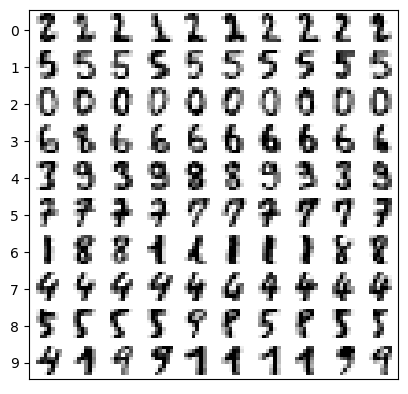

In [49]:
index = obtenir_echantillons(X, y_pred)
montrer_chiffres(X[index], y_pred[index])

**Question 11 :** Interpréter et commenter cette dernière figure. Existe-t-il un avantage à choisir un nombre de groupe différent de celui attendu ?

*Remarque : Le point déterminant de cet algorithme est le choix des positions initiales des centres. Un "bon choix" permet une convergence vers le minimum global en peu d'étapes. On peut grandement améliorer le choix de cette situation initiale en supervisant "un peu" : on peut étiqueter "à la main" quelques données, pour connaître a minima le nombre de groupes et donner des centres de groupes cohérents, puis laisser l'algorithme étiqueter les autres données.*

Pour aller plus loin sur la reconnaissance de caractères : http://mpechaud.fr/scripts/kmeans/kmeansdigits.html 

## Autre application : compression d'images

Voir http://mpechaud.fr/scripts/kmeans/kimage.html